**Implementation of the famous tipping problem**

**Antecedants:**
Aervice and Quality

**Consequent**:
Tip

Rule Base
Rule 1: IF the service was good or the food quality was good, THEN the tip will be high.

Rule 2: IF the service was average, THEN the tip will be medium.

Rule 3: IF the service was poor or the food quality was poor THEN the tip will be low.

For explanation go through https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [0]:
!pip install skfuzzy


In [3]:
!pip install -U scikit-fuzzy


    100% |████████████████████████████████| 1.0MB 22.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/81/d9/eb/b8321c08339f51be3e991e7ae45b9673270cb8ca8271482ab1
Successfully built scikit-fuzzy


In [0]:
import skfuzzy as fuzz

In [0]:
from skfuzzy import control as ctrl

In [0]:
quality=ctrl.Antecedent(np.arange(0,11,1), 'quality') #arange(0,11,1) is the numpy array of 0 to 10 with jump of 1

In [0]:
service=ctrl.Antecedent(np.arange(0,11,1), 'service') #Antecedent is the name for an input variable. For initialising input variable we use Antecedent method

In [0]:
tip=ctrl.Consequent(np.arange(0,26,1), 'tip') #Consequent is the name of output variable

In [0]:
quality.automf(3) #The automf function divides the range in n parts(here we have given 3)
service.automf(3)

In [0]:
# We can make our custom membership functions as well
tip['low']=fuzz.trimf(tip.universe,(0,0,13)) #trimf is abbr for triangular membership function , the values given in input are (a,b,c) where a and c are the point which have 0 membership value and b has maximum value

In [0]:
tip['medium']=fuzz.trimf(tip.universe, (0,13,25))
tip['high']=fuzz.trimf(tip.universe,(13,25,25))

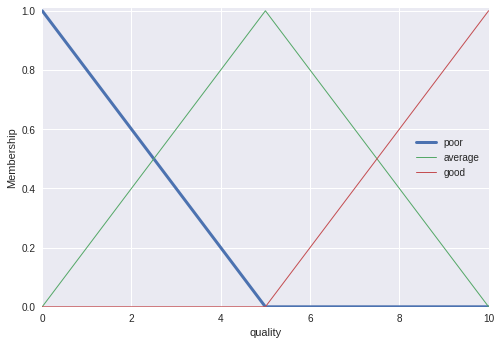

In [13]:
quality['poor'].view()

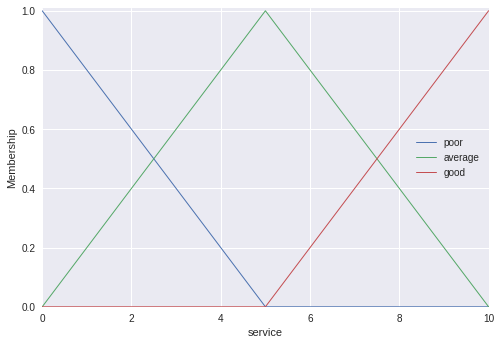

In [14]:
service.view()

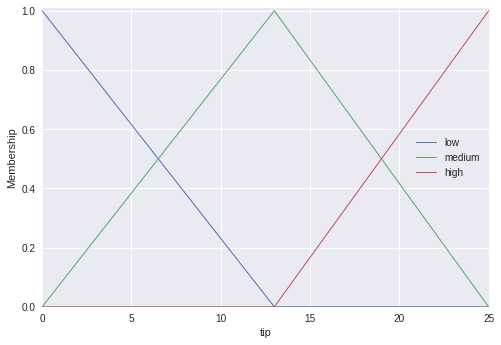

In [15]:
tip.view()

In [0]:
# Now we will make rules for our system
#Rule 1: If the food is poor OR the service is poor, then the tip will be low
#Rule 2: If the service is average, then the tip will be medium
#Rule 3: If the food is good OR the service is good, then the tip will be high.

In [0]:
rule1=ctrl.Rule(quality['poor'] | service['poor'] , tip['low'])
rule2=ctrl.Rule(service['average'] , tip['medium'])
rule3=ctrl.Rule(quality['good'] | service['good'] , tip['high'])

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feb49eee668>)

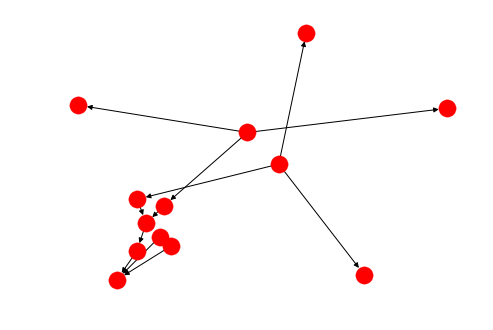

In [19]:
rule1.view()

In [0]:
tipping_ctrl=ctrl.ControlSystem([rule1, rule2, rule3]) #Now we will make ControlSystem from the rules we have made 
# For adding a rule, we use tipping_ctrl.addrule(rule4)

In [0]:
# Now we will make a variable which will simulate the model
tipping_Simulation_model = ctrl.ControlSystemSimulation(tipping_ctrl)

In [0]:
#Now we will see one example of one simulation, we will take the readings as quality=6.5, and service=9.8
tipping_Simulation_model.input['quality']=6.5
tipping_Simulation_model.input['service']=9.8

In [0]:
tipping_Simulation_model.compute() #We are computing all the output variables 

In [29]:
tipping_Simulation_model.output['tip'] #Printing the value of the output variable 'tip'

19.847607361963192